<a href="https://colab.research.google.com/github/Ria-K912/QML-HEP-Tasks/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 80.0 MB/s eta 0:00:00


In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

1) implement a simple quantum operation with Cirq or Pennylane  

a) With 5 qubits   

b) Apply Hadamard operation on every qubit   

c) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)   

d) SWAP (0, 4)   

e) Rotate X with pi/2 on any qubit   

f) Plot the circuit


In [4]:

dev1 = qml.device("default.qubit", wires=5)

@qml.qnode(dev1)
def quantum_circuit1():
    # Hadamard to all qubits
    for i in range(5):
        qml.Hadamard(wires=i)

    # CNOT operations
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 4])

    # SWAP (0, 4)
    qml.SWAP(wires=[0, 4])

    # Rotate X with pi/2 on qubit 2
    qml.RX(np.pi / 2, wires=2)

    return qml.state()

print("Quantum Circuit 1:")
print(qml.draw(quantum_circuit1)())



Quantum Circuit 1:
0: ──H─╭●──────────╭SWAP───────────┤  State
1: ──H─╰X─╭●───────│───────────────┤  State
2: ──H────╰X─╭●────│──────RX(1.57)─┤  State
3: ──H───────╰X─╭●─│───────────────┤  State
4: ──H──────────╰X─╰SWAP───────────┤  State


2) Implement a second circuit with a framework of your choice:  

a) Apply a Hadmard gate to the first qubit  

b) rotate the second qubit by pi/3 around X  

c) Apply Hadamard gate to the third and fourth qubit  

d) Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>




Quantum Circuit 2 (Corrected Swap Test):
0: ──H────────╭●────╭●─────H─┤  Probs
1: ──H────────├SWAP─│────────┤       
2: ──RX(1.05)─│─────├SWAP────┤       
3: ──H────────╰SWAP─│────────┤       
4: ──H──────────────╰SWAP────┤       


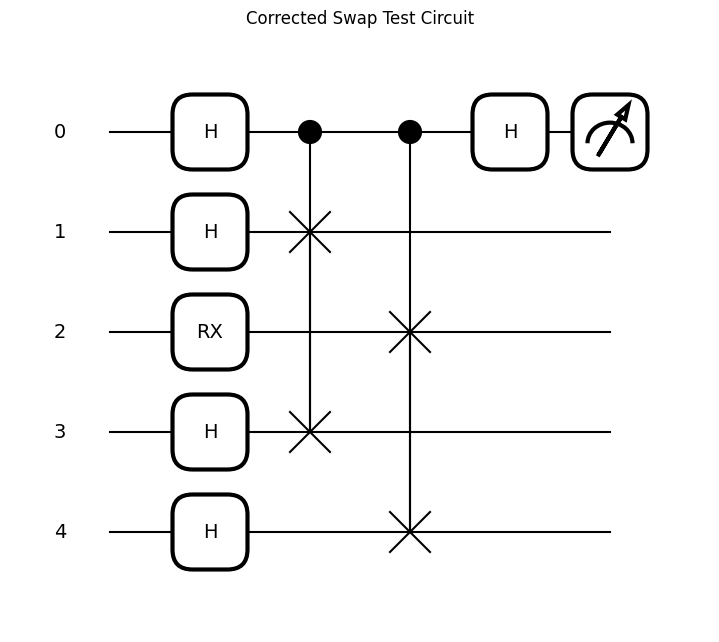

Probability of measuring |0> (similar states): 0.7500
Probability of measuring |1> (different states): 0.2500


In [ ]:
# 1 auxiliary + 4 main qubits
dev2 = qml.device("default.qubit", wires=5)

@qml.qnode(dev2)
def quantum_circuit2():
    """Quantum circuit with a correct swap test between |q1 q2> and |q3 q4>"""

    aux = 0  # auxiliary qubit
    q1, q2, q3, q4 = 1, 2, 3, 4  # Data qubits

    qml.Hadamard(wires=q1)  # Hadamard to q1
    qml.RX(np.pi / 3, wires=q2)  # Rotate q2 by pi/3 around X
    qml.Hadamard(wires=q3)  # Hadamard to q3
    qml.Hadamard(wires=q4)  # Hadamard to q4

    qml.Hadamard(wires=aux)

    qml.CSWAP(wires=[aux, q1, q3])  # Swap q1 <-> q3 if aux is |1>
    qml.CSWAP(wires=[aux, q2, q4])  # Swap q2 <-> q4 if aux is |1>

    qml.Hadamard(wires=aux)

    return qml.probs(wires=[aux])

print("\nQuantum Circuit 2 (Corrected Swap Test):")
print(qml.draw(quantum_circuit2)())

fig, ax = qml.draw_mpl(quantum_circuit2)()
plt.title("Corrected Swap Test Circuit")
plt.show()

probs = quantum_circuit2()
print(f"Probability of measuring |0> (similar states): {probs[0]:.4f}")
print(f"Probability of measuring |1> (different states): {probs[1]:.4f}")
